In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir = r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\train"
test_dir = r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test"

In [3]:
width, height = 400, 500

In [4]:
batch_size = 32

In [5]:
train_dateset = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True
)

In [6]:
test_dataset = ImageDataGenerator(rescale=1./255)

In [7]:
X_train = train_dateset.flow_from_directory(
    train_dir,
    target_size=(width, height),
    class_mode="categorical",
    batch_size=batch_size
)

Found 251 images belonging to 3 classes.


In [8]:
X_test = test_dataset.flow_from_directory(
    test_dir,
    target_size=(width, height),
    class_mode="categorical",
    batch_size=batch_size
)

Found 66 images belonging to 3 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(width, height, 3)),
    MaxPool2D((4, 4)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(3, activation="softmax")
])

In [12]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
history = model.fit(X_train, epochs=20, validation_data=X_test)

Epoch 1/20
8/8 [==============================] - 23s 3s/step - loss: 1.2144 - accuracy: 0.3745 - val_loss: 1.0719 - val_accuracy: 0.3939
Epoch 2/20
8/8 [==============================] - 23s 3s/step - loss: 0.9504 - accuracy: 0.6016 - val_loss: 0.8643 - val_accuracy: 0.5303
Epoch 3/20
8/8 [==============================] - 25s 3s/step - loss: 0.7385 - accuracy: 0.6574 - val_loss: 0.6188 - val_accuracy: 0.7576
Epoch 4/20
8/8 [==============================] - 23s 3s/step - loss: 0.6379 - accuracy: 0.6972 - val_loss: 0.6841 - val_accuracy: 0.7273
Epoch 5/20
8/8 [==============================] - 23s 3s/step - loss: 0.7268 - accuracy: 0.7012 - val_loss: 0.8901 - val_accuracy: 0.6515
Epoch 6/20
8/8 [==============================] - 23s 3s/step - loss: 0.5357 - accuracy: 0.7809 - val_loss: 0.5913 - val_accuracy: 0.7879
Epoch 7/20
8/8 [==============================] - 23s 3s/step - loss: 0.5232 - accuracy: 0.7928 - val_loss: 0.4943 - val_accuracy: 0.8182
Epoch 8/20
8/8 [==================

In [15]:
import matplotlib.pyplot as plt

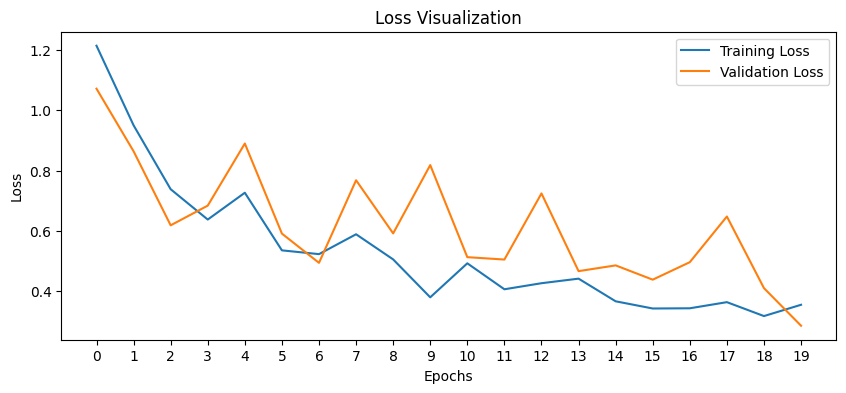

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Visualization")
plt.xticks(range(0, 20))
plt.show()

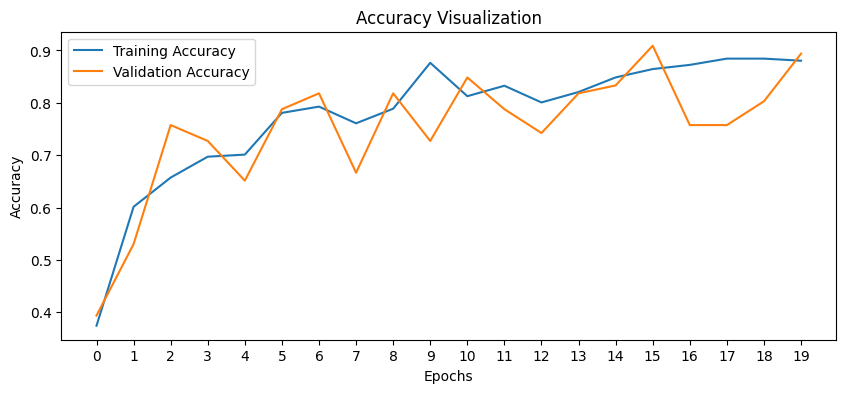

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Visualization")
plt.xticks(range(0, 20))
plt.show()

In [19]:
X_train.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [21]:
classes = {val:key for key, val in X_train.class_indices.items()}

In [22]:
classes

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [25]:
def predict_image(path):
    img = load_img(path, target_size=(width, height))
    img_arr = img_to_array(img)
    flatten_img = np.expand_dims(img_arr, axis=0)
    rescaled_img = flatten_img/255.0
    predicted_img = model.predict(rescaled_img)
    class_index = np.argmax(predicted_img[0])
    predicted_class = classes[class_index]
    return predicted_class

In [26]:
predict_image(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test\Viral Pneumonia\0116.jpeg")

1/1 [==============================] - 0s 35ms/step


'Viral Pneumonia'

In [27]:
predict_image(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\test\Covid\0108.jpeg")

1/1 [==============================] - 0s 48ms/step


'Covid'

In [28]:
predict_image(r"C:\Users\Soft\Desktop\Py\Docs\Covid19-dataset\train\Normal\050.jpeg")

1/1 [==============================] - 0s 39ms/step


'Normal'